In [ ]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
from tensorflow.keras.layers import Embedding,Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from sklearn.metrics import classification_report,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
train = pd.read_csv("sample_data/train.csv")
test  = pd.read_csv("sample_data/test.csv")

In [ ]:
train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


Виведемо розмір тестового та тренувального наборів даних.

In [ ]:
print("TRAIN ", train.shape)
print("TESTING ", test.shape)

TRAIN  (20800, 5)
TESTING  (5200, 4)


Перевірка нульових значень у тренувального та тестового наборів даних.

In [ ]:
train.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [ ]:
test.isnull().sum()

id          0
title     122
author    503
text        7
dtype: int64

## Decision tree на необроблених даних

In [ ]:
data = pd.read_csv('sample_data/train.csv')
data['text'] = data['text'].fillna('')
tfidf_vectorizer = TfidfVectorizer(max_features=17000)
tfidf_vectors = tfidf_vectorizer.fit_transform(data['text'])

# splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_vectors, data['label'], test_size=0.2, random_state=42)

# training the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(max_depth=2)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

Accuracy: 0.7939903846153846
Precision: 0.7300589390962672
Recall: 0.9161735700197239
Confusion Matrix:


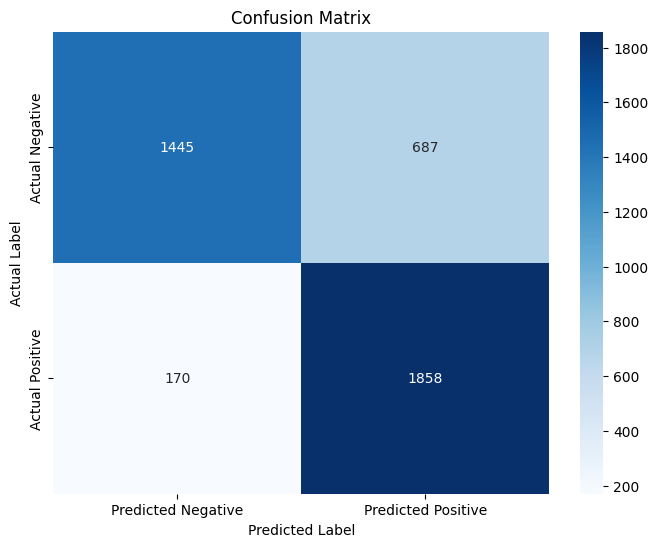

In [ ]:
y_pred = decision_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

## Random Forest на необроблених даних

Accuracy: 0.9396634615384616
Precision: 0.9480584972264247
Recall: 0.9270216962524654
Confusion Matrix:


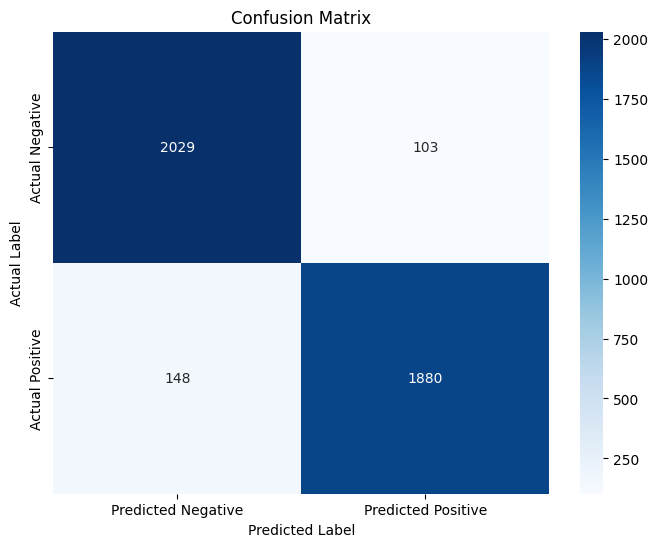

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)


y_pred = random_forest.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

## Функція препроцесингу тексту

In [ ]:
# function for preprocessing text
def preprocess_text(text):
    # сonvert text to lowercase
    text = text.lower()
    # remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # remove numbers
    text = re.sub(r'\d+', '', text)
    # remove extra whitespace
    text = text.strip()
    # remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

In [ ]:
data['text'] = data['text'].fillna('').apply(preprocess_text)

# extracting TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=17000)
tfidf_vectors = tfidf_vectorizer.fit_transform(data['text'])

# splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_vectors, data['label'], test_size=0.2, random_state=42)

## Decision Tree на оброблених даних

Accuracy: 0.7961538461538461
Precision: 0.7900688298918387
Recall: 0.7924063116370809
Confusion Matrix:


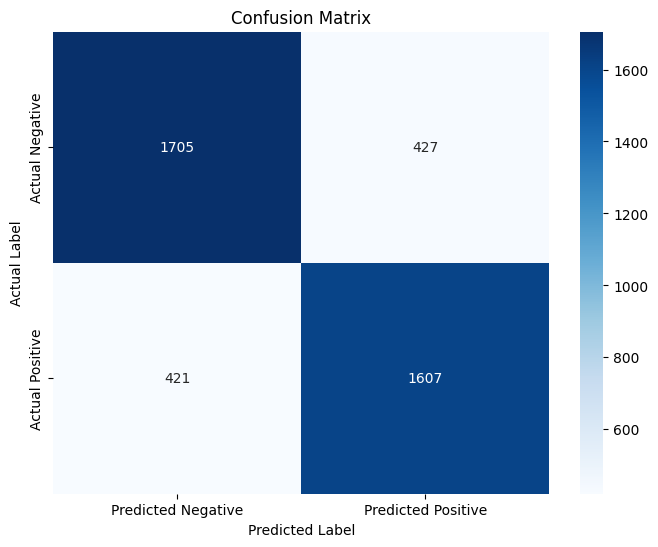

In [ ]:
decision_tree = DecisionTreeClassifier(max_depth=2)
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

## Random Forest на оброблених даних

Accuracy: 0.9360576923076923
Precision: 0.943158953722334
Recall: 0.9245562130177515
Confusion Matrix:


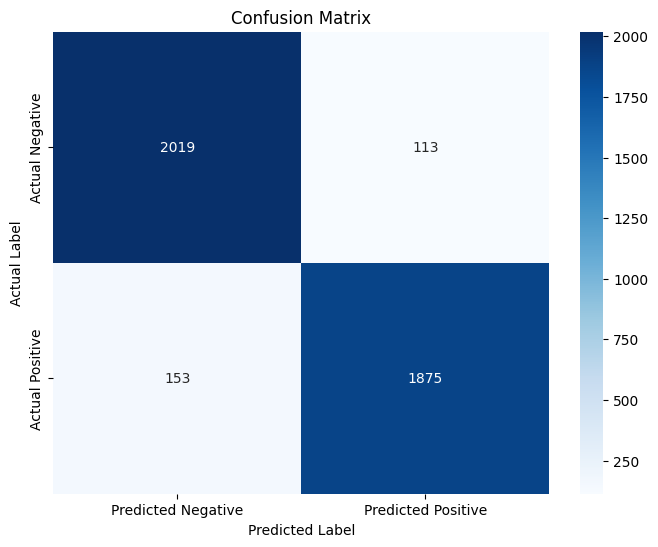

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("Confusion Matrix:")

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

### Оптимізація процесу

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Accuracy: 0.9401442307692308
Precision: 0.943640897755611
Recall: 0.9329388560157791
Confusion Matrix:


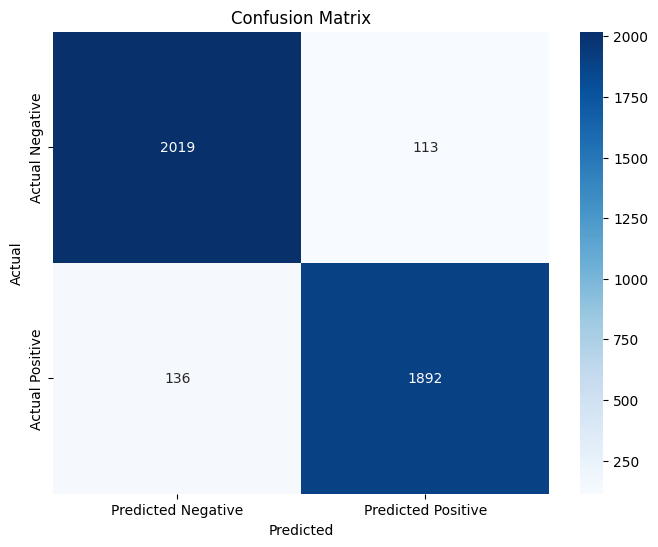

In [ ]:
import pandas as pd
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('stopwords')
nltk.download('wordnet')

data = pd.read_csv('sample_data/train.csv')

# preprocessing function with lemmatization
def preprocess_text(text):
    # convert to lowercase
    text = text.lower()
    # remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # remove numbers
    text = re.sub(r'\d+', '', text)
    # lemmatize words
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    words = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
    return ' '.join(words)

# apply preprocessing to the text
data['text'] = data['text'].fillna('').apply(preprocess_text)

# TF-IDF with bigrams
tfidf_vectorizer = TfidfVectorizer(max_features=17000, ngram_range=(1, 2))

# extracting features
tfidf_vectors = tfidf_vectorizer.fit_transform(data['text'])

# split dataset
X_train, X_test, y_train, y_test = train_test_split(tfidf_vectors, data['label'], test_size=0.2, random_state=42)

# random Forest Classifier with hyperparameter tuning
random_forest = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_leaf=2, max_features='sqrt')

random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.796875
Precision: 0.7912358444116199
Recall: 0.7924063116370809
Confusion Matrix:


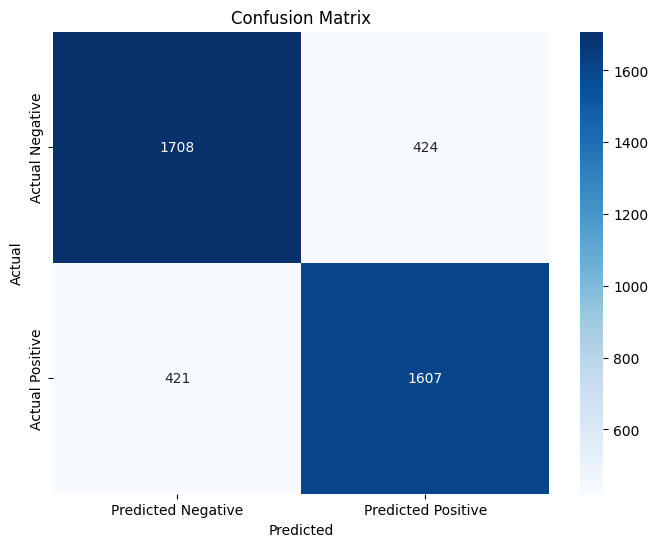

In [ ]:
decision_tree = DecisionTreeClassifier(
    max_depth=2,
)

decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("Confusion Matrix:")

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

## Додатковий метод - модель з застосуванням архітектури LSTM

In [ ]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Embedding,LSTM,Dense,Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("sample_data/train.csv")

In [ ]:
data = data.dropna()
data.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [ ]:
data.reset_index(inplace = True,drop = True)

In [ ]:
x = data["text"]
y = data["label"]

In [ ]:
cleaned = []
for i in range(0,len(data)):
    text = re.sub('[^a-zA-Z]',' ', x[i])
    text = text.lower()
    text = text.split()
    ps = PorterStemmer()
    text = [ps.stem(words) for words in text if words not in stopwords.words('english')]
    text = ' '.join(text)
    cleaned.append(text)

In [ ]:
vocab_size = 5000
one_hot_dir = [one_hot(words,vocab_size) for words in cleaned]
embedded_layer = pad_sequences(one_hot_dir,padding = 'pre')
embedded_layer
x = np.array(embedded_layer)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
#creating model using LSTM
model = Sequential()

#taking number features as 50
model.add(Embedding(vocab_size,50,input_length = len(embedded_layer[0])))
model.add(Dropout(0.5))

#adding LSTM layers with 100 neurons
model.add(LSTM(100))
model.add(Dropout(0.5))

#adding output layer
model.add(Dense(1,activation="sigmoid"))

#compiling the model
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 47, 50)            250000    
                                                                 
 dropout (Dropout)           (None, 47, 50)            0         
                                                                 
 lstm (LSTM)                 (None, 100)               60400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 310501 (1.18 MB)
Trainable params: 310501 (1.18 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train, validation_data = (x_test,y_test), epochs = 5, batch_size = 32)

Epoch 1/5
458/458 [==============================] - 28s 61ms/step - loss: 0.0060 - accuracy: 0.9984 - val_loss: 0.5415 - val_accuracy: 0.9180
Epoch 2/5
458/458 [==============================] - 28s 60ms/step - loss: 0.0053 - accuracy: 0.9985 - val_loss: 0.5439 - val_accuracy: 0.9182
Epoch 3/5
458/458 [==============================] - 33s 72ms/step - loss: 0.0064 - accuracy: 0.9980 - val_loss: 0.5199 - val_accuracy: 0.9221
Epoch 4/5
458/458 [==============================] - 28s 61ms/step - loss: 0.0070 - accuracy: 0.9975 - val_loss: 0.5347 - val_accuracy: 0.9210
Epoch 5/5
458/458 [==============================] - 29s 64ms/step - loss: 0.0069 - accuracy: 0.9976 - val_loss: 0.5247 - val_accuracy: 0.9177


In [ ]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

115/115 [==============================] - 2s 20ms/step


0.9176920973475526

## Додатковий метод - Логістична регресія

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Accuracy: 0.9403846153846154
Precision: 0.9278846153846154
Recall: 0.9516765285996055


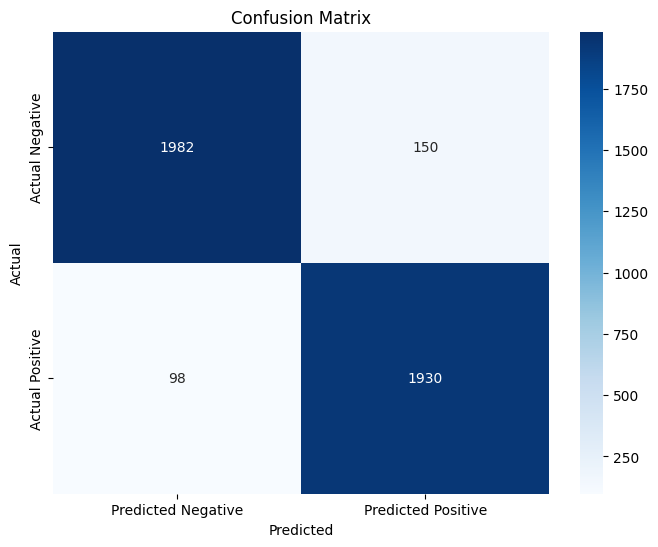

In [ ]:
from sklearn.linear_model import LogisticRegression
nltk.download('stopwords')
nltk.download('wordnet')
data = pd.read_csv('sample_data/train.csv')
data['text'] = data['text'].fillna('').apply(preprocess_text)
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectors = tfidf_vectorizer.fit_transform(data['text'])
X_train, X_test, y_train, y_test = train_test_split(tfidf_vectors, data['label'], test_size=0.2, random_state=42)
logistic_regression = LogisticRegression()

logistic_regression.fit(X_train, y_train)

y_pred = logistic_regression.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

plt.figure(f-igsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()